In [8]:
import numpy as np
import pandas as pd
contact_details = pd.read_json('livedata.json')
contact_details.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [9]:
contact_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [10]:
#Finding no of duplicate columns
contact_details.duplicated().value_counts()

False    100
dtype: int64

In [11]:
#Deleting the duplicate rows.
contact_details=contact_details.drop_duplicates()
contact_details

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404


In [12]:
#checking the number of missing values (null or NaN) in each column
contact_details.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

box_size is a tuple containing the limits.

In [13]:
#Defining the bounding box to analyze specific geographic areas.
box_size= (contact_details.longitude.min(),contact_details.longitude.max(),contact_details.latitude.min(), contact_details.latitude.max())
box_size

(77.5533811, 77.7054541, 13.0102837, 13.2496455)



1. "plt.imread" to read an image file named 'map.jpg'.
2. The "figure" variable represents the entire figure and "axis" represents the plot area within the figure.
3. The set_xlim and set_ylim methods set the limits of the x and y axes, respectively.
4. The "extent" parameter specifies the bounding box of the image in data coordinates and "aspect"='equal' ensures that the image is displayed with the correct aspect ratio.



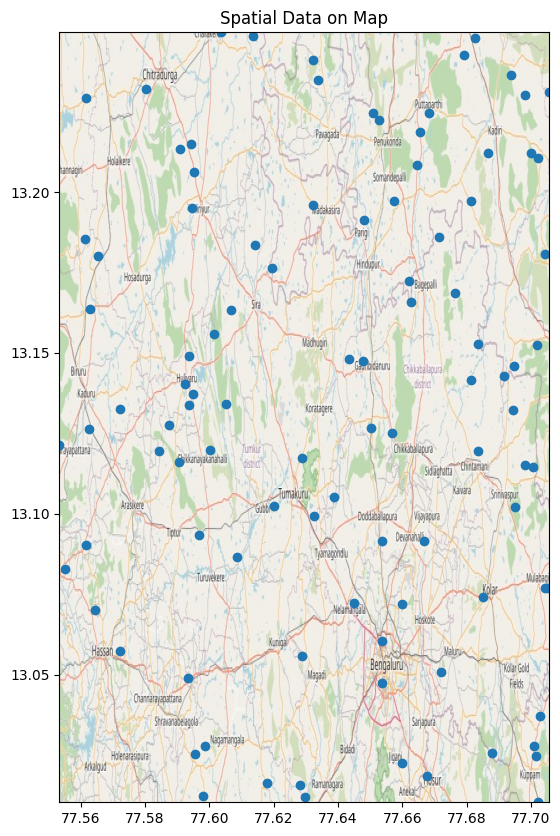

In [14]:
#The scatter plot likely represents the geographical locations associated with different contacts.It
#help to visualize the distribution of contacts in a specific area.
import matplotlib.pyplot as plt
map = plt.imread('map.jpg')
figure, axis = plt.subplots(figsize = (10,10))
axis.scatter(contact_details.longitude, contact_details.latitude)
axis.set_title('Spatial Data on Map')
axis.set_xlim(box_size[0],box_size[1])
axis.set_ylim(box_size[2],box_size[3])
axis.imshow(map, extent = box_size, aspect= 'equal')
plt.show()

1. The "Seaborn" library imported as "sns" used to create a scatter plot.
2. The "bbox_to_anchor" parameter specifies the position of the legend.
3. the color of each point is determined by the "id" column by using the parameter "hue"



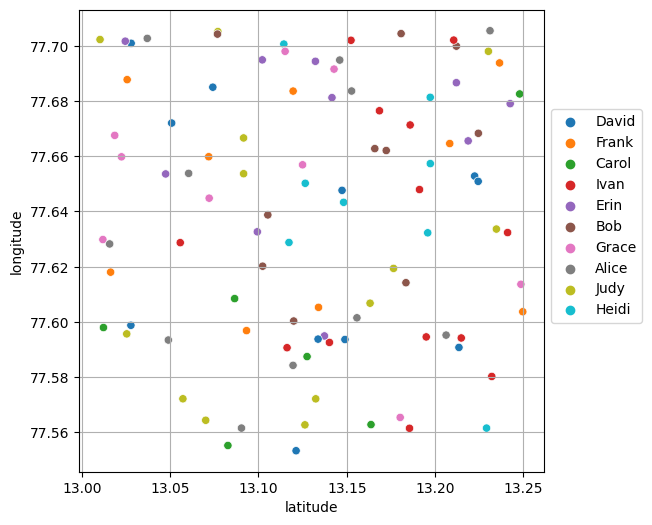

In [15]:
#Clusters of points with the same color (same "id") indicates groups of individuals who have been in close proximity.
import seaborn as sns
plt.figure(figsize=(6,6))
sns.scatterplot(x="latitude",y="longitude",data=contact_details,hue="id")
plt.legend(bbox_to_anchor= [1, 0.8])
plt.grid()

"sns" boxplots are used to check the outliers in the latitute and longitudes

[Text(0.5, 1.0, 'Box Plot of Scores')]

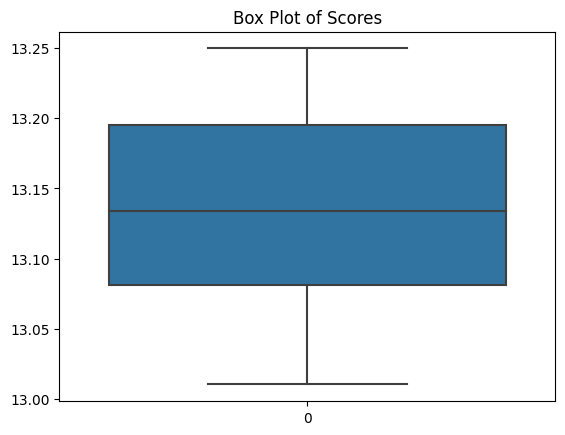

In [16]:
#Box plot is useful for identifying outliers in a dataset.
sns.boxplot(contact_details.get('latitude')).set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

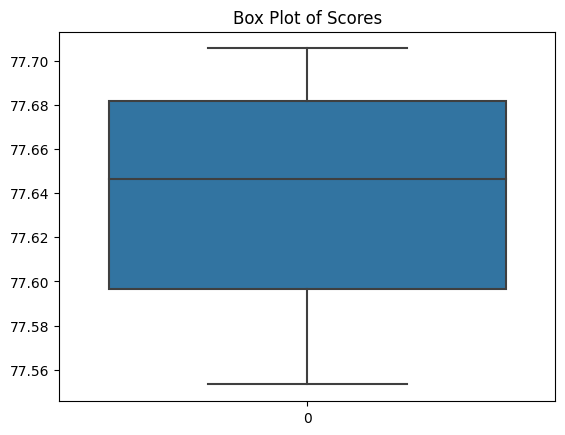

In [17]:
sns.boxplot(contact_details.get('longitude')).set(title="Box Plot of Scores")

In [19]:
from sklearn.cluster import DBSCAN

def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(contact_details[['latitude', 'longitude']])
    contact_details['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(contact_details)):
        if contact_details['id'][i] == input_name:
            if contact_details['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(contact_details['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = contact_details.loc[contact_details['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names
print(get_infected_names("Judy"))

['Bob']
